### ברק וורצברגר 316597541
### רתם בן עטר 318299914
### קישור לגיטהב
### https://github.com/barakwir/cars-prices-prediction.git

היי שון
נשמח להסביר בקצרה על המחברת ודרך הפעולה.
את הדאטה שקיבלנו ישר חילקנו לטריין וטסט
על הטריין עשינו את כל ההכנות ממילוי ערכים חסרים,הוצאת חריגים בחינות ויזואליות ועוד.
את הפונקצייה המבוקשת יצרנו בתחתית המחברת, חלונית קוד אחת לפני המודל שהיא החלונית האחרונה.
בעת הניסויים והבידקות התייחסו אל זה כטריין וטסט שלנו.
כעת בעת ההגשה אנו מבטלים את חלוקת הדאטה ומשתמשים בכולה כטריין ועל בסיסה נמלא את הערכים והעיבודים שנצטרך על הדאטה טסט שהיא הדאטה שאצלך.
מילוי ערכים מספריים כמו קילומטרז וכו נעשה על סמך מילונים שיצרנו מהדאטה טריין שלנו כדי להימנע מזליגת נתונים.
הרצה בודדת רק של הפונקציה תביא לשגיאה בקוד כי הרי אין לדאטה טסט יכולות להזין עבור עצמו נתונים שנסמכים על הטריין.
לכן שוב נציין לנוחיות והנגשה עבורך:
הפונקצייה המבוקשת נמצאת חלונית קוד אחת לפני הסוף במחברת.
בנוסף כמובן בהרצת הפונקצייה היא מחזירה את הדאטה פריים ששמרתם לכם אל המשתנה טסט דאטה,
לכן במודל עצמו הורדנו את הפיצול ל80 20 ופשוט הוא רץ לפי הדאטה טריין שלנו אל מול הדאטה טסט שלכם שחוזרת מהפונקצייה מעובדת.
תודה ובדיקה מהנה



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from scipy.stats import chi2_contingency
import matplotlib.ticker as ticker
import subprocess
import sys
import category_encoders as ce
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import ElasticNet
from sklearn.metrics import mean_squared_error, make_scorer
from sklearn.preprocessing import LabelEncoder
from sklearn.feature_extraction.text import TfidfVectorizer
import ppscore as pps

# Importing necessary libraries for data manipulation, visualization, statistical analysis, and machine learning

# Check if the 'category_encoders' library is installed
installed = subprocess.run([sys.executable, "-m", "pip", "show", "category_encoders"], capture_output=True, text=True)
if "Name: category-encoders" not in installed.stdout:
    # If 'category_encoders' is not installed, install it
    subprocess.check_call([sys.executable, "-m", "pip", "install", "category_encoders"])
else:
    # If 'category_encoders' is already installed, print a message
    print("category_encoders is already installed")


category_encoders is already installed


In [2]:
# Reading a CSV file
file_path = r"C:\Users\motiw\Desktop\תעשייה וניהול\למידת מכונה\dataset.csv"
data = pd.read_csv(file_path)

# Displaying the DataFrame
display(data)


,manufactor,Year,model,Hand,Gear,capacity_Engine,Engine_type,Prev_ownership,Curr_ownership,Area,City,Price,Pic_num,Cre_date,Repub_date,Description,Color,Km,Test,Supply_score
0,יונדאי,2015,i35,2,אוטומטית,1600,בנזין,פרטית,פרטית,רעננה - כפר סבא,רעננה,51000,2.0,11/07/2023,11/07/2023,['רכב שמור בקנאות\nמוכרת עקב קבלת רכב חברה'],כחול כהה מטאלי,144000,NaN,NaN
1,ניסאן,2018,ניסאן מיקרה,1,אוטומטית,1200,בנזין,פרטית,פרטית,מושבים בשרון,אבן יהודה,49000,0.0,06/04/2022,22/05/2022,['שמורה כל התוספות'],כחול בהיר,69000,NaN,NaN
2,סוזוקי,2010,סוזוקי סוויפט,1,אוטומטית,1450,בנזין,NaN,NaN,רמת,רמת,22500,1.0,29/10/2022,29/10/2022,['רכב במצב מתוחזק ברמה גבוהה טסט עד אפריל 2023'],None,145000,NaN,NaN
3,טויוטה,2016,אוריס,1,טיפטרוניק,1600,בנזין,פרטית,פרטית,נס ציונה - רחובות,רחובות,63000,5.0,16/05/2024,16/05/2024,['אוטו במצב חדש!! שמור בקנאות!! נהג יחיד מטופל...,אפור מטאלי,27300,NaN,NaN
4,קיה,2012,פיקנטו,1,אוטומטית,1248,בנזין,NaN,NaN,"ראשל""צ והסביבה",ראשון לציון,37000,1.0,13/06/2022,13/06/2022,['שמור'],NaN,70000,NaN,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1495,סקודה,2016,סקודה אוקטביה (2016),2,אוטומטית,"1,400",בנזין,NaN,NaN,ראש העין והסביבה,כפר קאסם,60000,1.0,18/07/2022,18/07/2022,['רכב שמור &lt;br/&gt;&lt;br/&gt;פירוט:&lt;br/...,NaN,180,NaN,NaN
1496,אלפא רומיאו,2013,אלפא רומיאו ג'ולייטה,4,ידנית,1400,בנזין,NaN,NaN,חיפה וחוף הכרמל,חיפה,45000,0.0,44791,44791,['פרטית \r\nמכונית יפיפיה ללא שום תאונות ואו ת...,NaN,160000,NaN,NaN
1497,סקודה,2014,סקודה ראפיד (2014),1,אוטומטית,"1,400",בנזין,NaN,NaN,NaN,כפר מנדא,30000,1.0,30/08/2022,30/08/2022,['רכב נקי גיר שילדה מנוע במצב מעולה &lt;br/&gt...,NaN,NaN,NaN,NaN
1498,ניסאן,2011,ניסאן ג'וק JUKE,3,אוטומטית,1600,בנזין,פרטית,פרטית,אשדוד - אשקלון,אשדוד,28000,0.0,31/08/2023,09/11/2023,"['רכב מתוחזק היטב ללא תאונות או תקלות, טסט עד ...",אפור מטאלי,118000,81,NaN


### First, I will split the data into training and test sets.
### I will work on the training set to learn how to complete all the missing values and determine what to use.
### Finally, based on the training set, I will use a function to fill and complete the test data to avoid data leakage.

In [3]:
# Splitting the data into training and test sets
df, test_data = train_test_split(data, test_size=0.2, random_state=42)


# General Examination of the Data

### Examine the number of duplicate rows and the size of the table

In [4]:
# Print the number of duplicate rows in the DataFrame
print(df.duplicated().sum())

# Print the shape of the DataFrame
print(df.shape)


105
(1200, 20)


### Examine the number of duplicate rows and the size of the table
### Remove duplicate rows and display the new size of the table

In [5]:
# Drop duplicate rows from the DataFrame
df = df.drop_duplicates()

# Print the shape of the DataFrame after dropping duplicates
print(df.shape)


(1095, 20)


### Examine the data type of each column

In [6]:
# Display the data types of the columns in the DataFrame
df.dtypes


manufactor          object
Year                 int64
model               object
Hand                 int64
Gear                object
capacity_Engine     object
Engine_type         object
Prev_ownership      object
Curr_ownership      object
Area                object
City                object
Price                int64
Pic_num            float64
Cre_date            object
Repub_date          object
Description         object
Color               object
Km                  object
Test                object
Supply_score       float64
dtype: object

### Modify the columns based on the code from the previous assignment

In [7]:
# Converting data types of specific columns
df['manufactor'] = df['manufactor'].astype(str)
df['Year'] = df['Year'].astype(int)
df['model'] = df['model'].astype(str)
df['Hand'] = df['Hand'].astype(int)
df['Gear'] = pd.Categorical(df['Gear'])
df['capacity_Engine'] = df['capacity_Engine'].str.replace(',', '').astype(float)
df['Engine_type'] = pd.Categorical(df['Engine_type'])
df['Prev_ownership'] = pd.Categorical(df['Prev_ownership'])
df['Curr_ownership'] = pd.Categorical(df['Curr_ownership'])
df['Area'] = df['Area'].astype(str)
df['City'] = df['City'].astype(str)
df['Description'] = df['Description'].astype(str)
df['Color'] = df['Color'].astype(str)
df['Km'] = pd.to_numeric(df['Km'].str.replace(',', ''), errors='coerce').astype('float64')

# Print the data types of the columns after conversion
print(df.dtypes)


manufactor           object
Year                  int32
model                object
Hand                  int32
Gear               category
capacity_Engine     float64
Engine_type        category
Prev_ownership     category
Curr_ownership     category
Area                 object
City                 object
Price                 int64
Pic_num             float64
Cre_date             object
Repub_date           object
Description          object
Color                object
Km                  float64
Test                 object
Supply_score        float64
dtype: object


### Check the percentage of missing values in each column

In [8]:
# Calculate the percentage of null values in each column
null_percent = df.isnull().mean() * 100

# Print the percentage of null values before dropping
print('Before drop:\n', null_percent)


Before drop:
 manufactor          0.000000
Year                0.000000
model               0.000000
Hand                0.000000
Gear                0.091324
capacity_Engine     1.917808
Engine_type         0.456621
Prev_ownership     51.689498
Curr_ownership     51.689498
Area                0.000000
City                0.000000
Price               0.000000
Pic_num             1.826484
Cre_date            0.000000
Repub_date          0.000000
Description         0.000000
Color               0.000000
Km                  6.027397
Test               91.780822
Supply_score       75.342466
dtype: float64


### Handling the City Column

In [9]:
# Print the count of unique values in the 'Gear' column
print(df['Gear'].value_counts())

# Print the unique values in the 'Gear' column
print(df['Gear'].unique())


אוטומטית     981
ידנית         58
טיפטרוניק     30
רובוטית       23
אוטומט         1
לא מוגדר       1
Name: Gear, dtype: int64
['אוטומטית', 'ידנית', 'רובוטית', 'טיפטרוניק', NaN, 'לא מוגדר', 'אוטומט']
Categories (6, object): ['אוטומטית', 'ידנית', 'רובוטית', 'טיפטרוניק', 'לא מוגדר', 'אוטומט']


### It is clear that most cars have automatic transmission, so we will fill in missing values, merge 'אוטומט' and 'אוטומטי', and replace 'לא מוגדר' with 'אוטומט'

In [10]:
# Fill missing values in the 'Gear' column with 'אוטומט'
df['Gear'].fillna('אוטומט', inplace=True)

# Replace 'אוטומטית' with 'אוטומט' in the 'Gear' column
df['Gear'] = df['Gear'].replace('אוטומטית', 'אוטומט')

# Replace 'לא מוגדר' with 'אוטומט' in the 'Gear' column
df['Gear'] = df['Gear'].replace('לא מוגדר', 'אוטומט')


### Handling the Manufacturer Column

In [11]:
# Print the unique values in the 'manufactor' column
df['manufactor'].unique()


array(['סובארו', 'הונדה', 'יונדאי', "פיג'ו", 'רנו', 'סקודה', 'קיה',
       'אופל', 'פולקסווגן', 'מיצובישי', 'פורד', 'מאזדה', 'סיטרואן',
       'ניסאן', 'אאודי', 'טויוטה', 'ב.מ.וו', 'סוזוקי', 'שברולט', 'מרצדס',
       'לקסוס', 'דייהטסו', 'מיני', 'קרייזלר', 'אלפא רומיאו', 'וולוו',
       'Lexsus'], dtype=object)

### Lexus vehicles appear in both Hebrew and English

In [12]:
# Filter the DataFrame to include only rows where the 'manufactor' is either 'לקסוס' or 'Lexus'
df_filtered = df[df['manufactor'].isin(['לקסוס', 'Lexus'])]

# Display the filtered DataFrame
df_filtered


,manufactor,Year,model,Hand,Gear,capacity_Engine,Engine_type,Prev_ownership,Curr_ownership,Area,City,Price,Pic_num,Cre_date,Repub_date,Description,Color,Km,Test,Supply_score
881,לקסוס,2008,לקסוס RC,4,אוטומט,NaN,גז,פרטית,פרטית,רמת גן - גבעתיים,בני ברק,60000,6.0,20/05/2024,10/06/2024,['None'],לבן,NaN,199,NaN
1289,לקסוס,2008,לקסוס GS300,3,אוטומט,NaN,בנזין,פרטית,פרטית,nan,זמר,40000,5.0,22/09/2022,22/09/2022,['לקסוס gs300 למכירה \nמנוע 3.0 v6\n250 כ״ס\nר...,אפור מטאלי,NaN,NaN,NaN
595,לקסוס,2014,לקסוס IS300H,3,אוטומט,NaN,היברידי,NaN,NaN,nan,כאבול,73000,1.0,09/07/2022,09/07/2022,['None'],nan,NaN,NaN,NaN
663,לקסוס,2010,לקסוס IS250,3,אוטומט,NaN,בנזין,NaN,NaN,אשדוד - אשקלון,אשדוד,65000,0.0,18/08/2022,18/08/2022,['רכב שנקנה מלקסוס ישראל-אצלי שנתיים-להניע ולנ...,nan,NaN,NaN,NaN
201,לקסוס,2014,לקסוס IS300h,3,אוטומט,NaN,היבריד,פרטית,פרטית,בקעת אונו,ברקת,82000,4.0,14/09/2022,14/09/2022,['רכב מסוג לקסוס is300h 2014 בצבע שחור מדהים!!...,שחור,NaN,NaN,NaN


### The Lexus column is duplicated, and the Hebrew version has missing values compared to the English version, so we will delete the Hebrew version

In [13]:
# Remove rows from the DataFrame where the 'manufactor' is 'לקסוס'
df = df[df['manufactor'] != 'לקסוס']


### Handling the Engine Capacity Column

In [14]:
# Display rows from the DataFrame where 'capacity_Engine' is null
df[df['capacity_Engine'].isnull()]


,manufactor,Year,model,Hand,Gear,capacity_Engine,Engine_type,Prev_ownership,Curr_ownership,Area,City,Price,Pic_num,Cre_date,Repub_date,Description,Color,Km,Test,Supply_score
628,מיצובישי,2015,ספייס סטאר,2,אוטומט,NaN,בנזין,פרטית,פרטית,בית שמש והסביבה,בית שמש,36000,0.0,13/01/2022,13/01/2022,['נהגת יחידה. אוטו שני בבית.הרכב במצב חדשש. 4צ...,כסוף מטאלי,100.0,NaN,NaN
1462,מיצובישי,2012,לנסר הדור החדש,3,אוטומט,NaN,בנזין,NaN,NaN,ירושלים והסביבה,ירושלים,25500,0.0,15/10/2022,15/10/2022,['רכב שמור ומטופלטסט לשנה '],nan,NaN,NaN,NaN
1295,מיצובישי,2015,אאוטלנדר,2,אוטומט,NaN,דיזל,NaN,NaN,חולון - בת ים,אזור,85000,1.0,10/05/2022,10/05/2022,['אאוטלנד הדגם המפואר ביותר כולל כל ה !מושבי ע...,nan,NaN,NaN,NaN
1222,מיצובישי,2016,אאוטלנדר,2,אוטומט,NaN,בנזין,NaN,NaN,באר שבע והסביבה,באר שבע,99000,1.0,07/10/2022,07/10/2022,['למכירה מציאה של ממש** אאוטלנדר 2016 5 מקומות...,nan,NaN,NaN,NaN
711,מיצובישי,2015,ספייס סטאר,1,אוטומט,NaN,בנזין,NaN,NaN,"ראשל""צ והסביבה",ראשון לציון,36900,1.0,18/04/2022,18/04/2022,['לבוא לקחת. התחייבות לקנייה חוזרת עד 5 שנים. ...,nan,NaN,NaN,NaN
388,מיצובישי,2015,אטראז',2,אוטומט,NaN,בנזין,NaN,NaN,יישובי השומרון,עץ אפרים,26000,1.0,27/10/2022,27/10/2022,['רכב במצב מעולה טסט לשנה.יד 1 ליסינג יד 2 פרט...,nan,NaN,NaN,NaN
739,מיצובישי,2016,אאוטלנדר,2,אוטומט,NaN,בנזין,NaN,NaN,nan,נחושה,87000,1.0,12/09/2022,12/09/2022,['רכב פשוט מעולה!נאלצים להיפרד כיוון שכבר לא ז...,nan,NaN,NaN,NaN
1400,מיצובישי,2009,אאוטלנדר,3,אוטומט,NaN,טורבו דיזל,NaN,NaN,"ראשל""צ והסביבה",באר יעקב,55000,1.0,24/07/2022,24/07/2022,[' הנטר מצב פצצה מנוע חדש טסט שנה מלאה '],nan,NaN,NaN,NaN
487,מיצובישי,2012,אאוטלנדר,1,אוטומט,NaN,בנזין,NaN,NaN,באר שבע והסביבה,דימונה,45500,1.0,03/07/2022,03/07/2022,['שמור ומטופל. פירוט: מקים שמשות ודיבורית. '],nan,NaN,NaN,NaN
399,קיה,2019,ריו,3,אוטומט,NaN,בנזין,NaN,NaN,באר שבע והסביבה,באר שבע,70000,1.0,22/09/2022,22/09/2022,['קיה ריו סוף 2019 הדגם החזק האצב\'ק GX אוט\' ...,nan,66000.0,NaN,NaN


### Note that all the missing engine capacities are for Mitsubishi and one for Kia, so we will provide appropriate values for them

In [15]:
# Find the indices of rows where 'capacity_Engine' is null
missing_indices = df[df['capacity_Engine'].isnull()].index

for idx in missing_indices:
    model_value = df.loc[idx, 'model']
    # Find the median 'capacity_Engine' value for the same 'model'
    model_median = df[df['model'] == model_value]['capacity_Engine'].median()
    if not np.isnan(model_median):
        df.loc[idx, 'capacity_Engine'] = model_median
    else:
        # If no suitable value is found, fill with the overall median of 'capacity_Engine'
        overall_median = df['capacity_Engine'].median()
        df.loc[idx, 'capacity_Engine'] = overall_median

# To fill missing values in the test data, generate median values for each model and the overall median
model_median_dict = df.groupby('model')['capacity_Engine'].median().to_dict()
overall_median = df['capacity_Engine'].median()

# Display rows where the 'manufactor' is 'מיצובישי'
df[df['manufactor'] == 'מיצובישי']


,manufactor,Year,model,Hand,Gear,capacity_Engine,Engine_type,Prev_ownership,Curr_ownership,Area,City,Price,Pic_num,Cre_date,Repub_date,Description,Color,Km,Test,Supply_score
628,מיצובישי,2015,ספייס סטאר,2,אוטומט,1200.0,בנזין,פרטית,פרטית,בית שמש והסביבה,בית שמש,36000,0.0,13/01/2022,13/01/2022,['נהגת יחידה. אוטו שני בבית.הרכב במצב חדשש. 4צ...,כסוף מטאלי,100.0,NaN,NaN
617,מיצובישי,2020,אקליפס,2,אוטומט,2000.0,בנזין,ליסינג,פרטית,חיפה וחוף הכרמל,טירת כרמל,85000,3.0,25/04/2024,25/04/2024,"['מיצובישי ASX 76,000 ק""מ מוכן גם להחליף.']",שחור,76000.0,109,15.0
1182,מיצובישי,2018,ספייס סטאר,1,אוטומט,1200.0,בנזין,פרטית,פרטית,מושבים בשרון,אבן יהודה,59000,1.0,06/04/2022,21/05/2022,['שמורה מאוד מטופלת ללא תאונות'],לבן פנינה,19000.0,NaN,5.0
331,מיצובישי,2017,ספייס סטאר,1,אוטומט,1200.0,בנזין,NaN,NaN,חולון - בת ים,בת ים,42000,1.0,01/08/2022,01/08/2022,[nan],nan,67000.0,NaN,3.0
1462,מיצובישי,2012,לנסר הדור החדש,3,אוטומט,1500.0,בנזין,NaN,NaN,ירושלים והסביבה,ירושלים,25500,0.0,15/10/2022,15/10/2022,['רכב שמור ומטופלטסט לשנה '],nan,NaN,NaN,NaN
1295,מיצובישי,2015,אאוטלנדר,2,אוטומט,1500.0,דיזל,NaN,NaN,חולון - בת ים,אזור,85000,1.0,10/05/2022,10/05/2022,['אאוטלנד הדגם המפואר ביותר כולל כל ה !מושבי ע...,nan,NaN,NaN,NaN
1222,מיצובישי,2016,אאוטלנדר,2,אוטומט,1500.0,בנזין,NaN,NaN,באר שבע והסביבה,באר שבע,99000,1.0,07/10/2022,07/10/2022,['למכירה מציאה של ממש** אאוטלנדר 2016 5 מקומות...,nan,NaN,NaN,NaN
711,מיצובישי,2015,ספייס סטאר,1,אוטומט,1200.0,בנזין,NaN,NaN,"ראשל""צ והסביבה",ראשון לציון,36900,1.0,18/04/2022,18/04/2022,['לבוא לקחת. התחייבות לקנייה חוזרת עד 5 שנים. ...,nan,NaN,NaN,NaN
242,מיצובישי,2017,ספייס סטאר,3,אוטומט,1200.0,בנזין,פרטית,פרטית,nan,מתתיהו,38500,3.0,28/08/2022,28/08/2022,['אמין וחסכוני.... והמחיר הוא סופי....'],כסוף,57000.0,NaN,3.0
66,מיצובישי,2021,ספייס סטאר,1,אוטומט,1200.0,בנזין,NaN,NaN,נתניה והסביבה,נתניה,76000,NaN,27/09/2022,27/09/2022,"['רכב חדש של אדם מבוגר (אבא שלי) רק 6000 ק""מ, ...",nan,6000.0,NaN,7.0


### It seems to have worked well; we will only change the Atrage model

In [16]:
# Replace 'capacity_Engine' value of 80 with 1200 for rows where 'model' is "אטראז'"
df.loc[df['model'] == "אטראז'", 'capacity_Engine'] = df.loc[df['model'] == "אטראז'", 'capacity_Engine'].replace(80, 1200)


### Handle the Engine Type Column

In [17]:
# Display the count of unique values in the 'Engine_type' column
df['Engine_type'].value_counts()


בנזין         967
דיזל           40
היבריד         27
היברידי        22
גז             18
טורבו דיזל      8
חשמלי           3
Name: Engine_type, dtype: int64

### Fill missing values with 'בנזין' (petrol)
### Additionally, merge 'היברידי' and 'היבריד' values

In [18]:
# Fill missing values in the 'Engine_type' column with 'בנזין'
df['Engine_type'].fillna('בנזין', inplace=True)

# Replace 'היבריד' with 'היברידי' in the 'Engine_type' column
df['Engine_type'] = df['Engine_type'].replace('היבריד', 'היברידי')


### Columns with more than fifty percent missing values are difficult to learn from, so we will remove them from our data

In [19]:
# Drop the columns 'Curr_ownership', 'Prev_ownership', 'Test', and 'Supply_score' from the DataFrame
df = df.drop(columns=['Curr_ownership', 'Prev_ownership', 'Test', 'Supply_score'])


### Handling Missing Values in the Kilometer Column
### First, we will display the distribution of data by the car's year of manufacture

<Figure size 864x864 with 0 Axes>

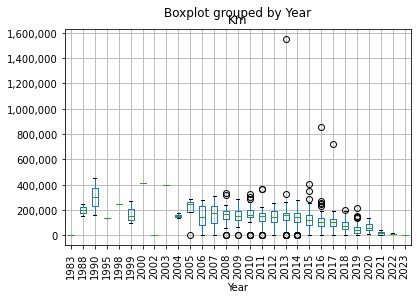

In [20]:
# Display a boxplot with grouping by year and values as Km
plt.figure(figsize=(12, 12))
ax = df.boxplot(column='Km', by='Year')

# Rotate the years by 90 degrees
plt.xticks(rotation=90)

# Format the y-axis to numerical values
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.show()

# Calculate the mean Km by year
mean_km_by_year = df.groupby('Year')['Km'].mean()


### Create a function that treats each year as a separate group
### The function will filter out missing and outlier values from the data
### Calculate the average for that year
### And replace the missing and outlier values with the calculated average

<Figure size 864x864 with 0 Axes>

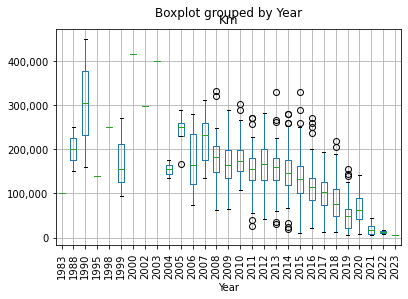

In [21]:
def clean_and_fill(group):
    # Create a copy of the group
    group = group.copy()
    
    # Create data without nulls and zeros
    group.loc[(group['Km'] < 1000) & (group['Km'] > 1), 'Km'] *= 1000
    non_na_values = group['Km'].replace(0, np.nan).dropna()
    
    # Calculate mean and standard deviation
    mean = non_na_values.mean()
    std = non_na_values.std()
    
    # Calculate Z-score
    z_scores = (non_na_values - mean) / std
    
    # Filter out outliers (values within 3 standard deviations)
    non_outliers = non_na_values[np.abs(z_scores) <= 3]
    
    # Calculate the mean of non-outlier values
    non_outliers_mean = non_outliers.mean()
    
    # Fill missing values in the 'Km' column with the mean of non-outlier values
    group['Km'].replace(0, np.nan, inplace=True)
    group['Km'].fillna(non_outliers_mean, inplace=True)
    
    # Find indices of outlier values
    outliers_indices = group[np.abs((group['Km'] - mean) / std) > 3].index
    
    # Replace outlier values with the mean of non-outlier values
    group.loc[outliers_indices, 'Km'] = non_outliers_mean
    
    return group

# Group data by year and apply the function
df = df.groupby('Year').apply(clean_and_fill).reset_index(drop=True)

# For test data
# Create a dictionary containing the mean for each year
year_km_mean_dict = df.groupby('Year')['Km'].mean().to_dict()

# Calculate the overall mean of 'Km' in the training data
overall_km_mean = df['Km'].mean()

# Reprint the box plot with processed data
plt.figure(figsize=(12, 12))
ax = df.boxplot(column='Km', by='Year')

# Rotate the years by 90 degrees
plt.xticks(rotation=90)

# Format the y-axis to numerical values
ax.yaxis.set_major_formatter(ticker.FuncFormatter(lambda x, pos: '{:,.0f}'.format(x)))
plt.show()


### Display the correlation between numerical columns
### Examine which columns are useful for predicting the price
### Based on a correlation close to zero

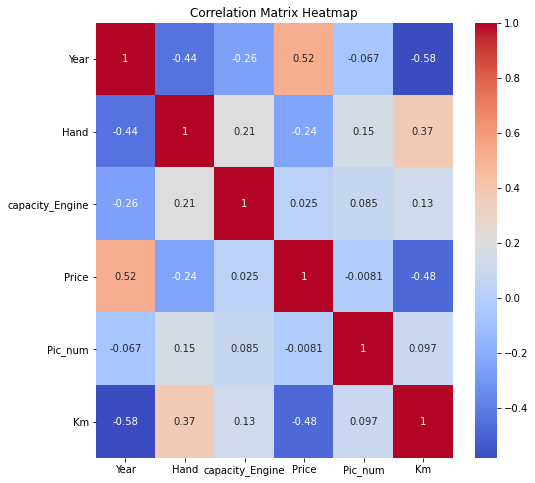

In [22]:
# Fill missing values in the 'capacity_Engine' column with the column's mean
df['capacity_Engine'].fillna(df['capacity_Engine'].mean(), inplace=True)

# Calculate the correlation matrix
correlation_matrix = df.corr()

# Create a heatmap of the correlation matrix
plt.figure(figsize=(8, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix Heatmap')
plt.show()


### Filter out the Picture Number Column

In [23]:
# Drop the column 'Pic_num' from the DataFrame
df = df.drop(columns=['Pic_num'])


### Use PPS (Predictive Power Score)
### To further assess the relationship between price and columns
### To select relevant columns

In [24]:
# Assuming 'df' is your DataFrame and 'Price' is your target variable
pps_matrix = pps.predictors(df, "Price")

# Display the pps matrix sorted by the 'ppscore' column
display(pps_matrix.sort_values(by='ppscore'))


,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
7,capacity_Engine,Price,0.000000,regression,True,mean absolute error,18966.859633,19139.691752,DecisionTreeRegressor()
8,Area,Price,0.000000,regression,True,mean absolute error,18966.859633,19643.255547,DecisionTreeRegressor()
9,City,Price,0.000000,regression,True,mean absolute error,18966.859633,19481.684620,DecisionTreeRegressor()
10,Cre_date,Price,0.000000,regression,True,mean absolute error,18966.859633,19627.435054,DecisionTreeRegressor()
11,Repub_date,Price,0.000000,regression,True,mean absolute error,18966.859633,19570.731786,DecisionTreeRegressor()
12,Description,Price,0.000000,regression,True,mean absolute error,18966.859633,24960.108772,DecisionTreeRegressor()
13,Color,Price,0.000000,regression,True,mean absolute error,18966.859633,19099.959904,DecisionTreeRegressor()
6,Engine_type,Price,0.008626,regression,True,mean absolute error,18966.859633,18803.243172,DecisionTreeRegressor()
5,Gear,Price,0.011952,regression,True,mean absolute error,18966.859633,18740.161479,DecisionTreeRegressor()
4,Hand,Price,0.055526,regression,True,mean absolute error,18966.859633,17913.696471,DecisionTreeRegressor()


### Display again to ensure that there are no more missing values in the data

In [25]:
# Calculate the percentage of null values in each column
null_percent = df.isnull().mean() * 100

# Print the percentage of null values before dropping
print('Before drop:\n', null_percent)


Before drop:
 manufactor         0.0
Year               0.0
model              0.0
Hand               0.0
Gear               0.0
capacity_Engine    0.0
Engine_type        0.0
Area               0.0
City               0.0
Price              0.0
Cre_date           0.0
Repub_date         0.0
Description        0.0
Color              0.0
Km                 0.0
dtype: float64


### Handle the Area Column and convert it to a simplified Region Column

In [26]:
# List of locations
locations = ['רעננה - כפר סבא', 'מושבים בשרון', 'רמת', 'נס ציונה - רחובות',
             'ראשל"צ והסביבה', 'פתח תקוה והסביבה', 'nan', 'חיפה וחוף הכרמל',
             'חולון - בת ים', 'ירושלים והסביבה', 'מושבים', 'כרמיאל והסביבה',
             'באר שבע והסביבה', 'גליל ועמקים', 'עכו - נהריה', 'בית שמש והסביבה',
             'גדרה יבנה והסביבה', 'אשדוד - אשקלון', 'טבריה והסביבה',
             'רמת גן - גבעתיים', 'קריות', 'תל אביב', 'ראש העין והסביבה',
             'עמק יזרעאל', 'נתניה והסביבה', 'בקעת אונו', 'גליל',
             'מודיעין והסביבה', 'פרדס', 'חדרה וישובי עמק חפר',
             'הוד השרון והסביבה', 'רמת השרון - הרצליה', 'None', 'חולון',
             'אזור השרון והסביבה', 'מושבים במרכז', 'קיסריה והסביבה',
             'מושבים בשפלה', 'רעננה', 'טבריה', 'אילת והערבה', 'זכרון - בנימינה',
             'רמלה - לוד', 'תל', 'הוד', 'עמק', 'ירושלים', 'יישובי השומרון',
             'פרדס חנה - כרכור', 'פתח', 'מודיעין', 'רמלה', 'ראשל"צ', 'נתניה',
             'מושבים בצפון', 'ראש', 'נס', 'חיפה', 'מושבים בדרום', 'רחובות']

# Function to map locations to broader regions
def map_location_to_region(location):
    north = ['חיפה וחוף הכרמל', 'כרמיאל והסביבה', 'גליל ועמקים', 'עכו - נהריה', 
             'טבריה והסביבה', 'קריות', 'גליל', 'טבריה', 'זכרון - בנימינה', 
             'יישובי השומרון', 'פרדס חנה - כרכור', 'חדרה וישובי עמק חפר', 
             'מושבים בצפון']
    
    center = ['רעננה - כפר סבא', 'מושבים בשרון', 'רמת', 'נס ציונה - רחובות', 
              'ראשל"צ והסביבה', 'פתח תקוה והסביבה', 'חולון - בת ים', 
              'ירושלים והסביבה', 'מושבים', 'גדרה יבנה והסביבה', 'רמת גן - גבעתיים', 
              'תל אביב', 'ראש העין והסביבה', 'נתניה והסביבה', 'בקעת אונו', 
              'מודיעין והסביבה', 'פרדס', 'הוד השרון והסביבה', 'רמת השרון - הרצליה', 
              'חולון', 'אזור השרון והסביבה', 'מושבים במרכז', 'קיסריה והסביבה', 
              'רעננה', 'רמלה - לוד', 'תל', 'הוד', 'עמק', 'ירושלים', 'פתח', 
              'מודיעין', 'רמלה', 'ראשל"צ', 'נתניה', 'רחובות']
    
    south = ['באר שבע והסביבה', 'אשדוד - אשקלון', 'אילת והערבה', 'מושבים בדרום']
    
    unknown = ['nan', 'None']
    
    if location in north:
        return 'צפון'
    elif location in center:
        return 'מרכז'
    elif location in south:
        return 'דרום'
    elif location in unknown:
        return 'לא ידוע'
    else:
        return 'מזרח'  # General assumption for another category

# Map the locations
mapped_locations = [map_location_to_region(location) for location in locations]

# Convert the results to a pandas series and assign to the DataFrame
df['Region'] = df['Area'].apply(map_location_to_region)

# Display the 'Region' column
df['Region']


0       לא ידוע
1          מרכז
2          דרום
3          מרכז
4          מרכז
         ...   
1085       מזרח
1086       מרכז
1087       מרכז
1088       מרכז
1089       מרכז
Name: Region, Length: 1090, dtype: object

### Examine the importance of categorical columns

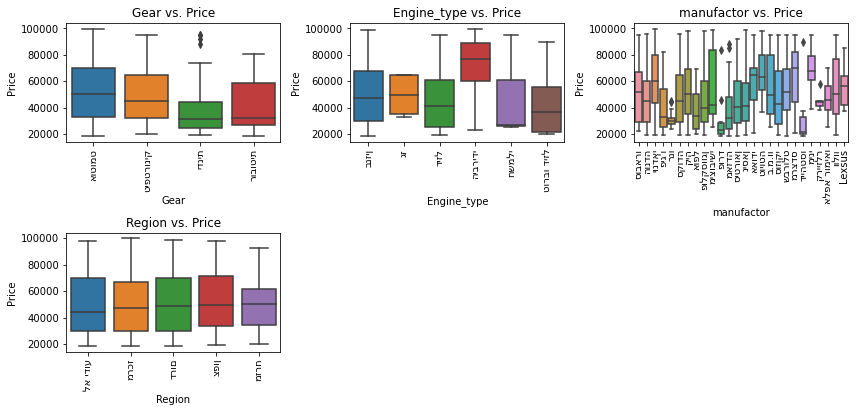

In [27]:
# List of categorical columns
categorical_columns = ['Gear', 'Engine_type', 'manufactor', 'Region']

# Create a figure for the box plots
plt.figure(figsize=(12, 8))

# Generate box plots for each categorical column against the 'Price'
for feature in categorical_columns:
    plt.subplot(3, 3, categorical_columns.index(feature) + 1)
    sns.boxplot(data=df, x=feature, y='Price')
    plt.title(f'{feature} vs. Price')
    plt.xticks(rotation=90)

# Adjust the layout and display the plots
plt.tight_layout()
plt.show()


### Use the Chi-square test to examine if there is a relationship between 
### each of the categorical columns and the price

In [28]:
# Loop through each column in the list of categorical columns
for col in categorical_columns:
    
    # Create a contingency table for the column and 'Price'
    contingency_table = pd.crosstab(df[col], df['Price'])

    # Perform Chi-square test
    chi2_stat, p_val, dof, expected = chi2_contingency(contingency_table)

    # Print the results of the Chi-square test
    print(f"\nChi-square test results for {col}:")
    print(f'Chi-square statistic: {chi2_stat}')
    print(f'P-value: {p_val}')
    print(f'Degrees of freedom: {dof}')



Chi-square test results for Gear:
Chi-square statistic: 520.1600556039905
P-value: 0.6579095164831403
Degrees of freedom: 534

Chi-square test results for Engine_type:
Chi-square statistic: 869.1473592034902
P-value: 0.6852161128407965
Degrees of freedom: 890

Chi-square test results for manufactor:
Chi-square statistic: 5144.13386172908
P-value: 1.160922869841215e-12
Degrees of freedom: 4450

Chi-square test results for Region:
Chi-square statistic: 717.5109152740214
P-value: 0.435133113076793
Degrees of freedom: 712


### In the columns Gear, Engine Type, and Region, there are differences in means, making them useful for understanding price differences in vehicles.
### The Manufacturer column, in its current form, does not help in prediction.

### Let's try to refine the Model column a bit

In [29]:
# Print the count of unique values in the 'model' column
print(df['model'].value_counts())

# Print the unique values in the 'model' column
print(df['model'].unique())


פיקנטו      79
קורולה      37
i10         32
גולף        24
פולו        23
            ..
אאודי S7     1
טרג'ט        1
CX           1
301          1
508          1
Name: model, Length: 259, dtype: int64
['XV' 'סיוויק' 'אלנטרה' 'i30' 'i10' '106' 'רנו קליאו דור 4'
 'סקודה סופרב (2012)' 'סונטה' 'פיקנטו' 'אדם' 'ג`טה' 'ספייס סטאר' 'פיאסטה'
 '3' 'מאזדה 3' 'C4' '2' 'ניסאן מיקרה' 'אוקטביה' 'סקודה אוקטביה RS (2014)'
 'אקורד' ' A1' 'סקודה אוקטביה (2016)' 'אינסייט' 'מוקה X' 'פריוס' 'סדרה 5'
 'סוזוקי SX4 קרוסאובר' 'סקודה אוקטביה (2013)' 'גולף' 'מאזדה 5' 'קורולה'
 'אוריס' 'מאזדה 2' 'איוניק' 'סטוניק' 'סקודה פאביה\r\n (2012)' 'אאודי A4'
 'CIVIC' 'ריו' 'סקודה אוקטביה (2015)' 'i25' 'אקליפס' 'ספיה' '5'
 'CADDY COMBI' 'אימפלה' 'מאזדה 6' 'נירו EV' ' C-Class' 'X1' 'C3' ' A3'
 'יאריס' '200' 'B4' 'ספארק' 'רנו קליאו' '208' 'סוזוקי קרוסאובר' 'אאוטבק'
 'שירוקו' 'קורסה' 'ולוסטר' 'חיפושית' "ניסאן ג'וק JUKE" 'אאודי S3'
 'אימפרזה' 'אקווינוקס' 'סוזוקי SX4' 'פוקוס' 'סיריון' 'סיד' 'קאונטרימן'
 'סקודה ראפיד (2013)' 'א

### I identified some duplicates and issues manually:
### Mazda models included both Mazda 5 and just 5 on its own
### Skoda models included the year, creating many different values for the same model
### Audi models contained both Audi A5 and just A5
### We also made some adjustments to Renault models
### Reducing these resulted in a decrease of about 40 unique values

In [30]:
def clean_model(model):
    # If the model starts with 'סקודה', remove 'סקודה ' and any years afterwards
    if model.startswith('סקודה '):
        model = model.replace('סקודה ', '', 1)  # Remove 'סקודה ' only
        model = model.split()[0]  # Take the first part of the string (model name only)
    elif model.startswith('אאודי '):
        model = model.replace('אאודי ', '', 1)  # Remove 'אאודי ' only
    elif model.startswith('מאזדה '):
        model = model.split()[1]
    elif model.startswith('רנו '):
        model = model.split()[1]
    model = model.strip()
    return model

# Apply this function to the 'model' column and update the column in place
df['model'] = df['model'].apply(clean_model)


### Let's revisit the Engine Capacity column and clean the missing values

In [31]:
# Group by 'model' and calculate aggregated statistics for 'capacity_Engine'
df.groupby('model')['capacity_Engine'].agg(['min', 'max', 'mean', 'median', 'std', 'count'])


,min,max,mean,median,std,count
model,,,,,,
106,1200.0,1200.0,1200.000000,1200.0,NaN,1
108,1000.0,1000.0,1000.000000,1000.0,NaN,1
120i,2000.0,2000.0,2000.000000,2000.0,NaN,1
2,1498.0,1500.0,1499.333333,1500.0,1.154701,3
200,2143.0,2500.0,2260.750000,2200.0,161.747488,4
...,...,...,...,...,...,...
ראפיד,1000.0,1600.0,1354.444444,1400.0,166.347611,9
רומסטר,1197.0,1200.0,1199.250000,1200.0,1.500000,4
ריו,900.0,1400.0,1328.428571,1400.0,188.919610,7


### Display a graph of the data distribution

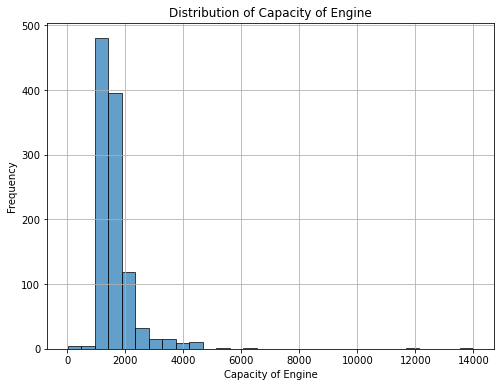

In [32]:
# Create a histogram to display the distribution of 'capacity_Engine'
plt.figure(figsize=(8, 6))
plt.hist(df['capacity_Engine'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Capacity of Engine')
plt.ylabel('Frequency')
plt.title('Distribution of Capacity of Engine')
plt.grid(True)
plt.show()


### Now, replace any engine capacity smaller than 500 with the median value of the same car model

In [33]:
# Calculate the median 'capacity_Engine' for each 'model' and reset the index
stats = df.groupby('model')['capacity_Engine'].median().reset_index()
stats.columns = ['model', 'median_capacity_Engine']  # Rename the columns

# Replace values less than 500 with the median for the same model
for index, row in stats.iterrows():
    model = row['model']
    median_value = row['median_capacity_Engine']
    
    df.loc[(df['model'] == model) & (df['capacity_Engine'] < 500), 'capacity_Engine'] = median_value


### Replace any engine capacity larger than 5000 and with a standard deviation greater than 1000 with the median value

In [34]:
# Calculate the median and standard deviation 'capacity_Engine' for each 'model' and reset the index
stats = df.groupby('model')['capacity_Engine'].agg(['median', 'std']).reset_index()
stats.columns = ['model', 'median_capacity_Engine', 'std_capacity_Engine']  # Rename the columns

# Replace values greater than 5000 with the median for the same model where standard deviation is greater than 1000
for index, row in stats.iterrows():
    model = row['model']
    median_value = row['median_capacity_Engine']
    std_value = row['std_capacity_Engine']
    
    # Replace values under certain conditions
    if std_value > 1000:
        df.loc[(df['model'] == model) & (df['capacity_Engine'] > 5000), 'capacity_Engine'] = median_value


### Any remaining unique value greater than 10000 will be divided by ten, as it is likely a typo

In [35]:
# Adjust 'capacity_Engine' values greater than 10000 by dividing them by 10
df.loc[df['capacity_Engine'] > 10000, 'capacity_Engine'] = df.loc[df['capacity_Engine'] > 10000, 'capacity_Engine'] / 10

# Dictionaries to be used for filling test data
model_median_dict = df.groupby('model')['capacity_Engine'].median().to_dict()

# Calculate the overall median of 'capacity_Engine' in the training data
overall_median = df['capacity_Engine'].median()

# Calculate the median and standard deviation 'capacity_Engine' for each 'model' and reset the index
model_stats = df.groupby('model')['capacity_Engine'].agg(['median', 'std']).reset_index()
model_stats.columns = ['model', 'median_capacity_Engine', 'std_capacity_Engine']


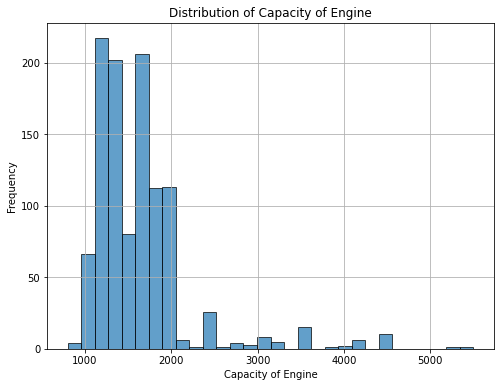

In [36]:
# Create a histogram to display the distribution of 'capacity_Engine'
plt.figure(figsize=(8, 6))
plt.hist(df['capacity_Engine'], bins=30, edgecolor='black', alpha=0.7)
plt.xlabel('Capacity of Engine')
plt.ylabel('Frequency')
plt.title('Distribution of Capacity of Engine')
plt.grid(True)
plt.show()


### We observed a small positive correlation; we will consider whether to include it in the model later.

### Removing the last columns that we will not use

In [37]:
# Drop the specified columns from the DataFrame
df = df.drop(['Area', 'City', 'Cre_date', 'Repub_date', 'Description', 'Color', 'Description'], axis=1)


### Converting categorical columns to numerical using `get_dummies`

In [38]:
# Convert categorical variables into dummy/indicator variables
df = pd.get_dummies(df, columns=['model', 'Engine_type', 'manufactor', 'Gear', 'Region'])


# The Required Function
### Any active processes for modifying or filling values and columns performed on the training data are also applied here to the test data.
### As noted, missing value imputation and anomaly corrections based on averages and other metrics are derived from the training data.
### This approach avoids data leakage and prevents calculating averages based on the test data itself.

In [39]:
def prepare_data(test_data):
    # Remove duplicates
    test_data = test_data.drop_duplicates()

    # Change column types
    test_data['manufactor'] = test_data['manufactor'].astype(str)
    test_data['Year'] = test_data['Year'].astype(int)
    test_data['model'] = test_data['model'].astype(str)
    test_data['Hand'] = test_data['Hand'].astype(int)
    test_data['Gear'] = pd.Categorical(test_data['Gear'])
    test_data['capacity_Engine'] = test_data['capacity_Engine'].str.replace(',', '').astype(float)
    test_data['Engine_type'] = pd.Categorical(test_data['Engine_type'])
    test_data['Prev_ownership'] = pd.Categorical(test_data['Prev_ownership'])
    test_data['Curr_ownership'] = pd.Categorical(test_data['Curr_ownership'])
    test_data['Area'] = test_data['Area'].astype(str)
    test_data['City'] = test_data['City'].astype(str)
    test_data['Description'] = test_data['Description'].astype(str)
    test_data['Color'] = test_data['Color'].astype(str)
    test_data['Km'] = pd.to_numeric(test_data['Km'].str.replace(',', ''), errors='coerce').astype('float64')

    # Fill nulls in Gear
    test_data['Gear'] = test_data['Gear'].astype('category')
    if 'אוטומט' not in test_data['Gear'].cat.categories:
        test_data['Gear'] = test_data['Gear'].cat.add_categories(['אוטומט'])
    test_data['Gear'].fillna('אוטומט', inplace=True)

    # Merge same values
    test_data['Gear'] = test_data['Gear'].replace('אוטומטית', 'אוטומט')
    test_data['Gear'] = test_data['Gear'].replace('לא מוגדר', 'אוטומט')

    # Remove unnecessary manufactor values
    test_data = test_data[test_data['manufactor'] != 'לקסוס']

    # Fill nulls in capacity_Engine
    missing_indices = test_data[test_data['capacity_Engine'].isnull()].index

    # Fill missing values with the median of the model or overall median if not available
    for idx in missing_indices:
        model_value = test_data.loc[idx, 'model']
        if model_value in model_median_dict:
            test_data.loc[idx, 'capacity_Engine'] = model_median_dict[model_value]
        else:
            test_data.loc[idx, 'capacity_Engine'] = overall_median
    test_data.loc[test_data['model'] == "אטראז'", 'capacity_Engine'] = test_data.loc[test_data['model'] == "אטראז'", 'capacity_Engine'].replace(80, 1200)

    # Fill nulls in Engine_type
    test_data['Engine_type'].fillna('בנזין', inplace=True)
    test_data['Engine_type'] = test_data['Engine_type'].replace('היבריד', 'היברידי')

    # Drop unnecessary columns
    test_data = test_data.drop(columns=['Curr_ownership', 'Prev_ownership', 'Test', 'Supply_score'])

    # Handle missing values in Km
    test_data['Km'].replace(0, np.nan, inplace=True)
    missing_indices = test_data[test_data['Km'].isnull()].index

    # Fill missing values with the mean of the year or overall mean if not available
    for idx in missing_indices:
        year_value = test_data.loc[idx, 'Year']
        if year_value in year_km_mean_dict:
            test_data.loc[idx, 'Km'] = year_km_mean_dict[year_value]
        else:
            test_data.loc[idx, 'Km'] = overall_km_mean

    # Handle outliers in test data
    for year, mean_value in year_km_mean_dict.items():
        year_group = test_data[test_data['Year'] == year]
        if not year_group.empty:
            mean = mean_value
            std = year_group['Km'].std()
            z_scores = (year_group['Km'] - mean) / std
            outliers_indices = year_group[np.abs(z_scores) > 3].index
            test_data.loc[outliers_indices, 'Km'] = mean_value

    # Drop unnecessary columns
    test_data = test_data.drop(columns=['Pic_num'])

    # Map locations to broader categories
    mapped_locations = [map_location_to_region(location) for location in locations]
    test_data['Region'] = test_data['Area'].apply(map_location_to_region)

    # Clean model names
    test_data['model'] = test_data['model'].apply(clean_model)

    # Replace values less than 500 with the median for the same model
    for index, row in model_stats.iterrows():
        model = row['model']
        median_value = row['median_capacity_Engine']
        test_data.loc[(test_data['model'] == model) & (test_data['capacity_Engine'] < 500), 'capacity_Engine'] = median_value

    # Handle outliers greater than 5000 based on standard deviation condition
    for index, row in model_stats.iterrows():
        model = row['model']
        median_value = row['median_capacity_Engine']
        std_value = row['std_capacity_Engine']
        if std_value > 1000:
            test_data.loc[(test_data['model'] == model) & (test_data['capacity_Engine'] > 5000), 'capacity_Engine'] = median_value

    # Handle values greater than 10000
    test_data.loc[test_data['capacity_Engine'] > 10000, 'capacity_Engine'] = test_data.loc[test_data['capacity_Engine'] > 10000, 'capacity_Engine'] / 10

    # Fill outliers less than 500 and zeros with overall median for models not present in training data
    test_data.loc[(test_data['capacity_Engine'] < 500) | (test_data['capacity_Engine'] == 0), 'capacity_Engine'] = overall_median

    # Drop unnecessary columns
    test_data = test_data.drop(['Area', 'City', 'Cre_date', 'Repub_date', 'Description', 'Color', 'Description'], axis=1)

    # Convert categorical variables into dummy/indicator variables
    test_data = pd.get_dummies(test_data, columns=['model', 'Engine_type', 'manufactor', 'Gear', 'Region'])

    # Ensure both datasets have the same columns
    all_columns = df.columns
    test_data = test_data.reindex(columns=all_columns, fill_value=0)

    return test_data

# Prepare the test data
test_data = prepare_data(test_data)


<ipython-input-39-56a6bf6bbd16>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['manufactor'] = test_data['manufactor'].astype(str)
<ipython-input-39-56a6bf6bbd16>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['Year'] = test_data['Year'].astype(int)
<ipython-input-39-56a6bf6bbd16>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.p

# The Model We Built
### As mentioned, we removed the split,
### Currently, for us, the split is the training data we received initially as a whole,
### and the test data is the data you saved for yourselves.
### We have left below the results of the 80-20 split performed on the training data to determine the top five most significant features.

### Creating the Predictive Model and Evaluating Predictions

In [40]:
# Define X_train and y_train
X_train = df.drop(['Price'], axis=1)
y_train = df['Price']

# Define X_test and y_test
X_test = test_data.drop(['Price'], axis=1)  # If 'Price' is not present in test_data, adjust this to the appropriate column
y_test = test_data['Price']

# Data preprocessing
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Instantiate Elastic Net model
elastic_net = ElasticNet(random_state=42)

# Define the parameter grid for GridSearchCV
param_grid = {
    'alpha': [0.1],
    'l1_ratio': [0.9]
}

# Create a custom scorer for RMSE
rmse_scorer = make_scorer(mean_squared_error, squared=False)

# Instantiate GridSearchCV with ElasticNet and the parameter grid
grid_search = GridSearchCV(elastic_net, param_grid, cv=10, scoring=rmse_scorer, n_jobs=-1)

# Fit GridSearchCV
grid_search.fit(X_train_scaled, y_train)

# Get the best model with optimized hyperparameters
best_model = grid_search.best_estimator_

# Evaluate the model on the test set
y_pred = best_model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = best_model.score(X_test_scaled, y_test)

print(f'Best Parameters: {grid_search.best_params_}')
print(f'Mean Squared Error (MSE): {mse:.2f}')
print(f'Root Mean Squared Error (RMSE): {rmse:.2f}')
print(f'R-squared (R2): {r2:.2f}')

# Cross-validation scores
cv_scores = cross_val_score(best_model, X_train_scaled, y_train, cv=10, scoring=rmse_scorer)
print(f'Cross-validated RMSE scores: {cv_scores}')
print(f'Mean cross-validated RMSE: {np.mean(cv_scores):.2f}')

# Get feature importances
feature_importances = pd.Series(best_model.coef_, index=X_train.columns)

# Sort features by their absolute importance and select the top 5
top_features_abs = feature_importances.abs().sort_values(ascending=False).head(5)
print("Top 5 Important Features (absolute values):")
print(top_features_abs)

# Select the same top 5 features but with their original coefficients
top_features = feature_importances.loc[top_features_abs.index]
print("\nTop 5 Important Features (with original coefficients):")
print(top_features)


Best Parameters: {'alpha': 0.1, 'l1_ratio': 0.9}
Mean Squared Error (MSE): 138072930.20
Root Mean Squared Error (RMSE): 11750.44
R-squared (R2): 0.72
Cross-validated RMSE scores: [17032.78528989 11216.55137485 10603.86411438 16276.5155632
 14655.56256736  9173.62338805 18888.15092361 18352.75535001
 19012.64843978 12150.16444316]
Mean cross-validated RMSE: 14736.26
Top 5 Important Features (absolute values):
Year                16227.269593
Km                   6849.997601
model_325            4251.633424
manufactor_מרצדס     4013.286914
model_קורבט          3879.256382
dtype: float64

Top 5 Important Features (with original coefficients):
Year                16227.269593
Km                  -6849.997601
model_325            4251.633424
manufactor_מרצדס     4013.286914
model_קורבט          3879.256382
dtype: float64


# The Top Five Most Significant Features Are:
### 1. **Year** (Positive Impact)
### 2. **Mileage** (Negative Impact)
### 3. **Model Type: Unknow** (Negative Impact)
### 4. **Model Type: Mercedes** (Positive Impact)
### 5. **Corvette** (Positive Impact)